In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
import pandas as pd
import csv
import pandas as pd

# Read the file as fixed-width formatted
df = pd.read_csv('Train Set.csv', encoding='ISO-8859-1', sep=';')
test = pd.read_csv('Test Set.csv', encoding='ISO-8859-1', sep=';')


In [50]:
submission = pd.read_csv('Submission.csv',encoding='ISO-8859-1', sep=',')
test = pd.read_csv('Test Set.csv', encoding='ISO-8859-1', sep=';')

In [51]:

df["time"] = pd.to_datetime(df["time"])
df.replace(',','.', regex=True, inplace=True)

In [52]:
df.rename(columns={'temperature_2m (EEC)': 'temperature', 'dew_point_2m (EEC)' : 'dew_point', 'apparent_temperature (EEC)' :
                   'apparent_temperature', 'wind_direction_10m (EE)' : 'wind_direction_10m', 'wind_direction_100m (EE)' :
                   'wind_direction_100m', 'soil_temperature_0_to_7cm (EEC)' : 'soil_temperature_0_to_7cm',
                   'soil_temperature_7_to_28cm (EEC)' : 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm (EEC)' :
                   'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm (EEC)' : 'soil_temperature_100_to_255cm'}, inplace=True)

In [53]:
for_cols = df.drop(['time', 'precipitation (mm)', 'electricity_shutdown'], axis=1)
cols = for_cols.columns

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

In [54]:
from sklearn.metrics import mean_squared_error
df = df.sample(frac=1, random_state=2)
train_df = df[:17000]
train_df = train_df.reset_index(drop=True)
test_df = df[17000:]
test_df = test_df.reset_index(drop=True)
from sklearn.metrics import mean_absolute_error
import numpy as np
df['precipitation (mm)'] = pd.to_numeric(df['precipitation (mm)'], errors='coerce')
# Get the true values from the test dataset
y_test = test_df['precipitation (mm)'].to_numpy()

# Calculate the baseline predictions (using the mean precipitation value)
average_precipitation_value = df['precipitation (mm)'].mean()
baseline_model_test_predictions = np.array([average_precipitation_value] * len(test_df))
# Convert y_test and baseline_model_test_predictions to numeric, coercing errors to NaN
y_test = pd.to_numeric(y_test, errors='coerce')
baseline_model_test_predictions = pd.to_numeric(baseline_model_test_predictions, errors='coerce')

# Remove any NaN values that might have resulted from the conversion
# Ensure the lengths are consistent
valid_indices = ~np.isnan(y_test) & ~np.isnan(baseline_model_test_predictions)
y_test = y_test[valid_indices]
baseline_model_test_predictions = baseline_model_test_predictions[valid_indices]

# Now calculate sMAPE
def rmse(y_true, y_pred):
     mse = mean_squared_error(y_true, y_pred)
     return np.sqrt(mse)
baseline_rmse = rmse(y_test, baseline_model_test_predictions)
print(f'Baseline RMSE: {baseline_rmse:.2f}%')

# # Calculate sMAPE
# def smape(y_true, y_pred):
#     return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# baseline_smape = smape(y_test, baseline_model_test_predictions)
# print(f'Baseline sMAPE: {baseline_smape:.2f}%')


Baseline RMSE: 0.93%


In [55]:
df['electricity_shutdown'].value_counts()

0.0    13858
1.0      131
Name: electricity_shutdown, dtype: int64

In [56]:
var = df.columns.values
var = np.delete(var,np.where(var=="electricity_shutdown"))
var = np.delete(var,np.where(var=="ID"))
var = np.delete(var, np.where(var == "time"))
for feature in var:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

print(df.dtypes)

ID                                             int64
time                                  datetime64[ns]
temperature                                  float64
relative_humidity_2m (%)                     float64
dew_point                                    float64
apparent_temperature                         float64
precipitation (mm)                           float64
pressure_msl (hPa)                           float64
surface_pressure (hPa)                       float64
cloud_cover (%)                              float64
cloud_cover_low (%)                          float64
cloud_cover_mid (%)                          float64
cloud_cover_high (%)                           int64
vapour_pressure_deficit (kPa)                float64
wind_speed_10m (km/h)                        float64
wind_speed_100m (km/h)                       float64
wind_direction_10m                           float64
wind_direction_100m                          float64
wind_gusts_10m (km/h)                        f

In [57]:
print(len(var))

33


C:\Users\Adli\AppData\Local\Temp\ipykernel_11556\1961011995.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5,label="No Shutdown")
C:\Users\Adli\AppData\Local\Temp\ipykernel_11556\1961011995.py:13: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Shutdown")
C:\Users\Adli\AppData\Local\Temp\ipykernel_11556\1961011995.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  

<Figure size 640x480 with 0 Axes>

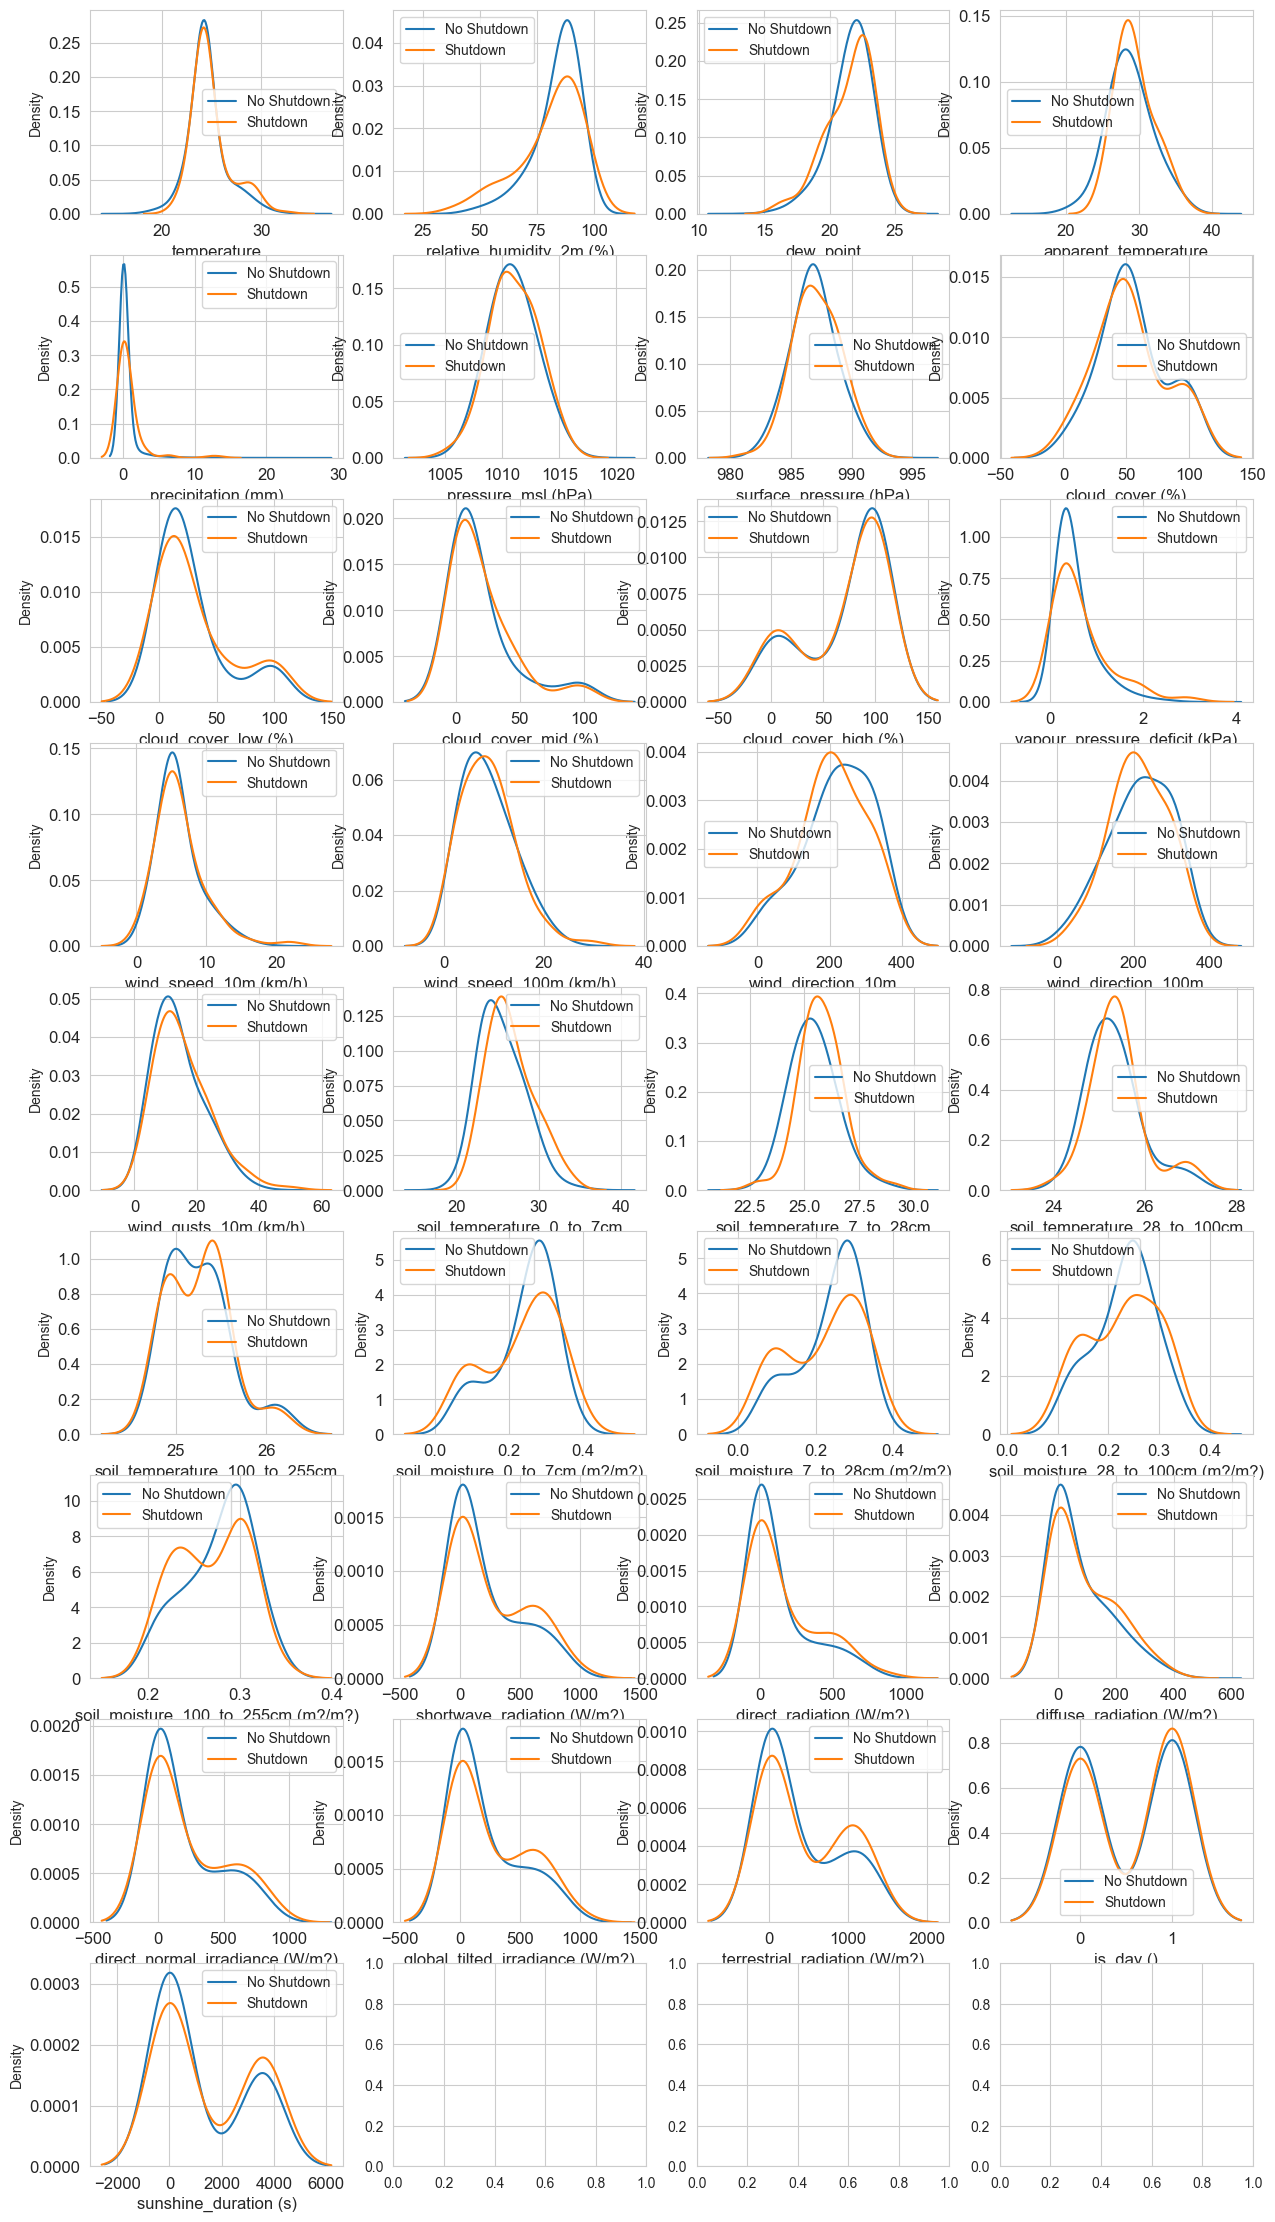

In [58]:

i = 0
t0 = df.loc[df['electricity_shutdown'] == 0]
t1 = df.loc[df['electricity_shutdown'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(9,4,figsize=(15,28))

for feature in var:
    i += 1
    plt.subplot(9,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="No Shutdown")
    sns.kdeplot(t1[feature], bw=0.5,label="Shutdown")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()
plt.show()


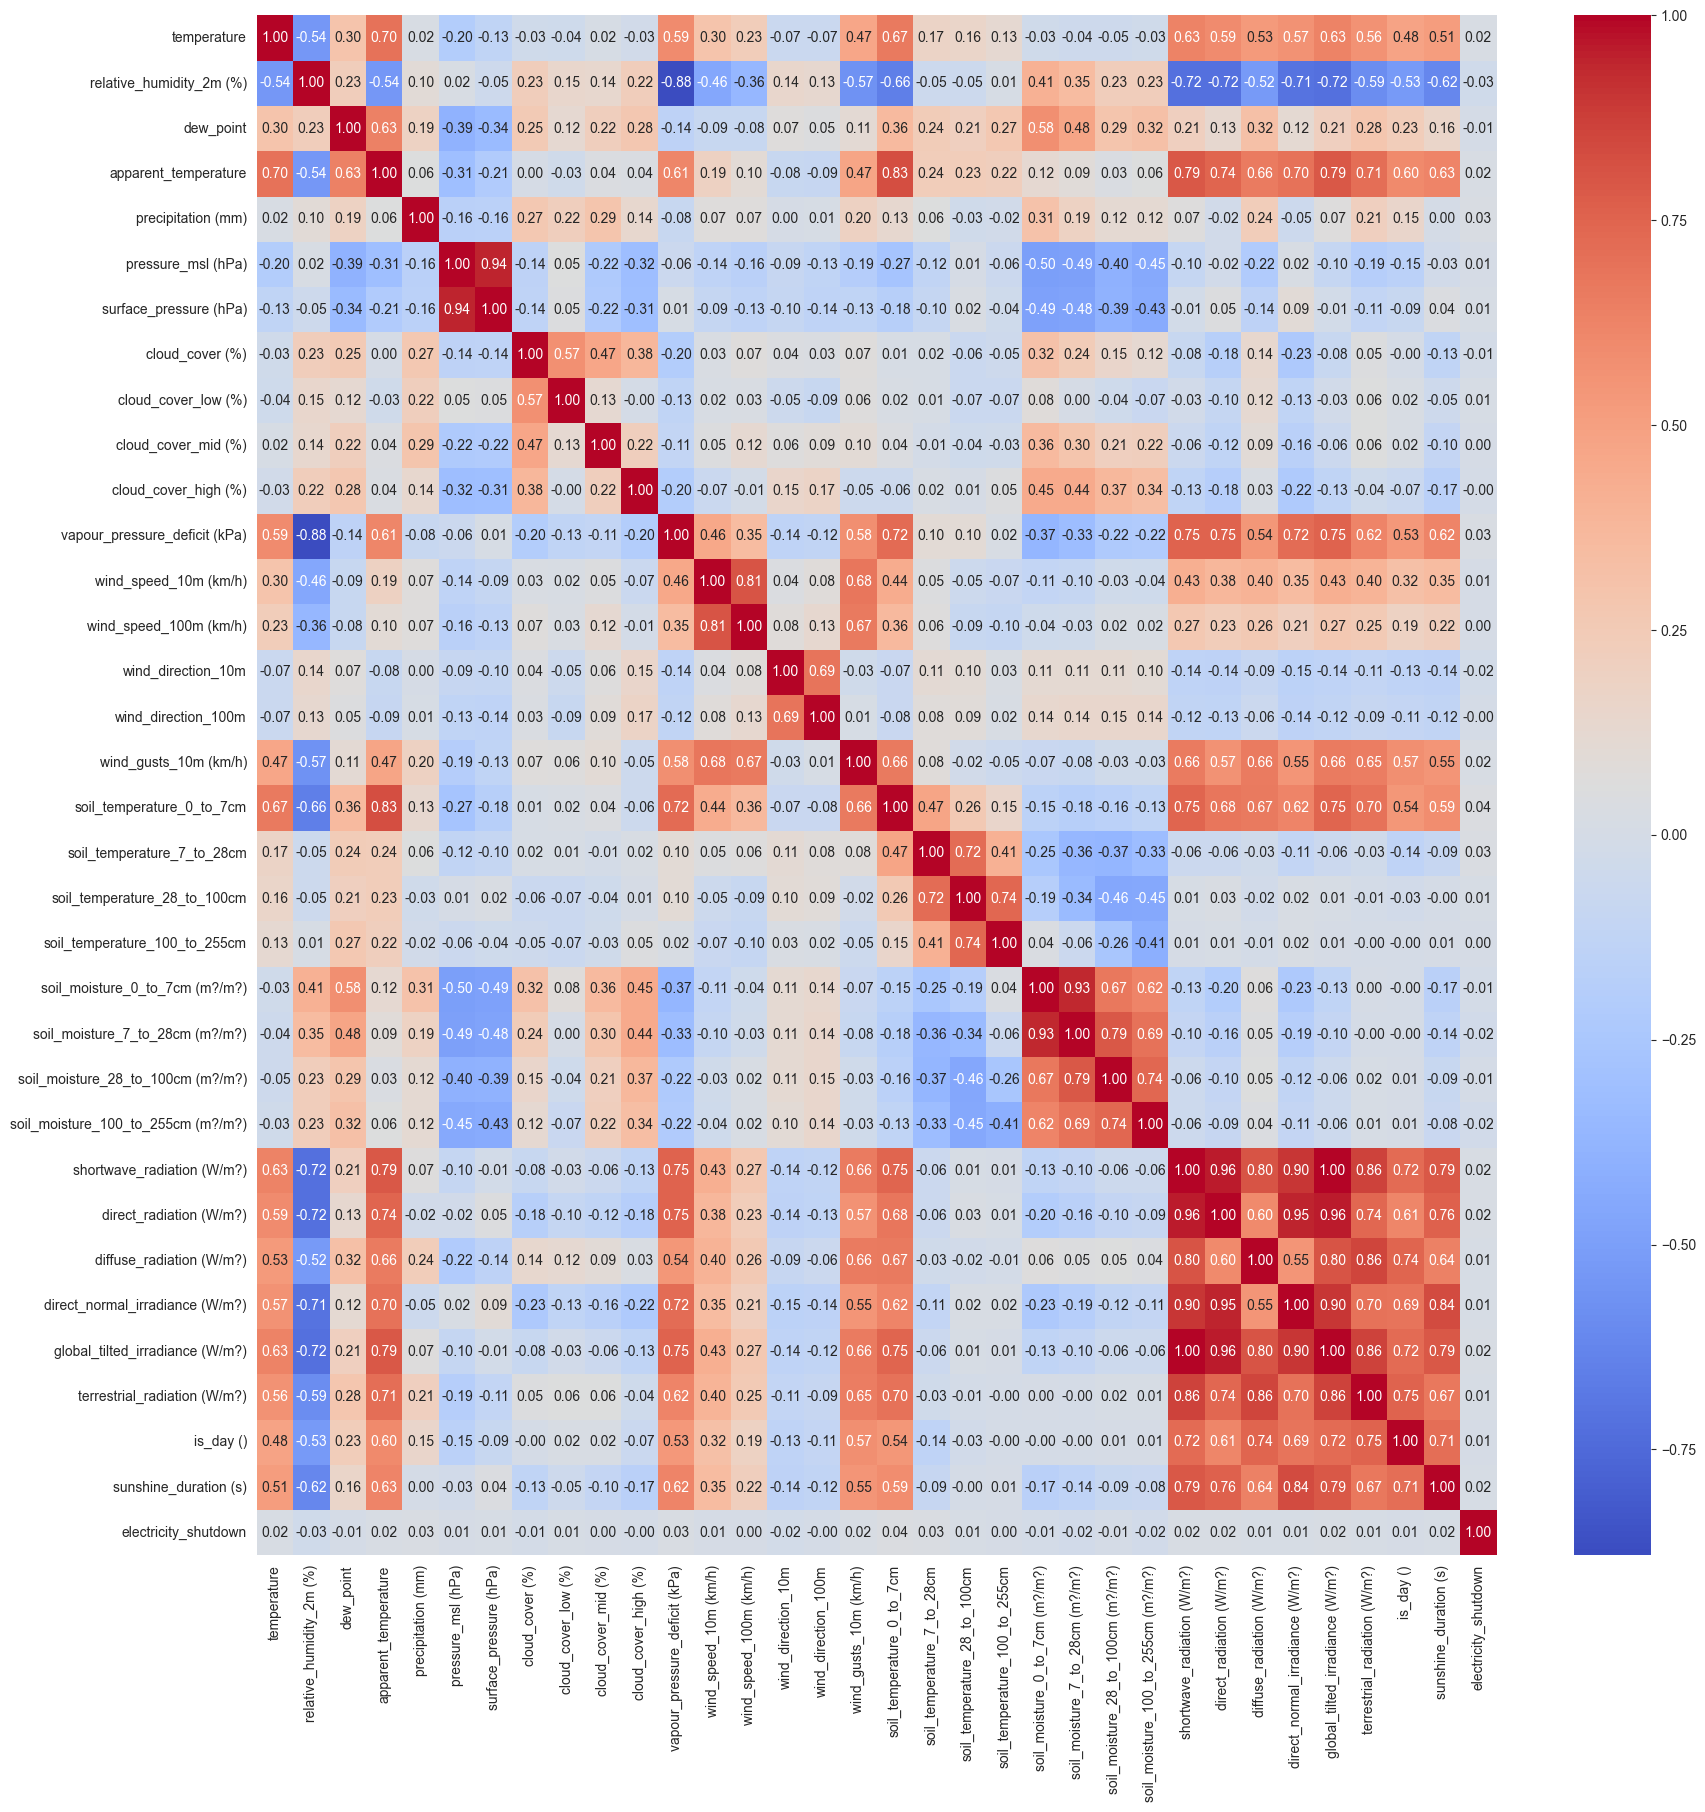

In [59]:
temp = df.drop(columns=['ID', 'time'])
plt.figure(figsize=(20,20))
sns.heatmap(temp.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

In [60]:
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day_name()
df['month'] = df['time'].dt.to_period('M')
df.drop(columns=['global_tilted_irradiance (W/m?)'], inplace=True)
filtered_df = df[df['electricity_shutdown'].notnull()]
filtered_df2 = df[df['precipitation (mm)'].notnull()]
filtered_df['precipitation (mm)'].fillna(filtered_df2['precipitation (mm)'].median(), inplace=True)
filtered_df2['electricity_shutdown'].fillna(filtered_df2['electricity_shutdown'].median(), inplace=True)

C:\Users\Adli\AppData\Local\Temp\ipykernel_11556\1358416086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['precipitation (mm)'].fillna(filtered_df2['precipitation (mm)'].median(), inplace=True)
C:\Users\Adli\AppData\Local\Temp\ipykernel_11556\1358416086.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['electricity_shutdown'].fillna(filtered_df2['electricity_shutdown'].median(), inplace=True)


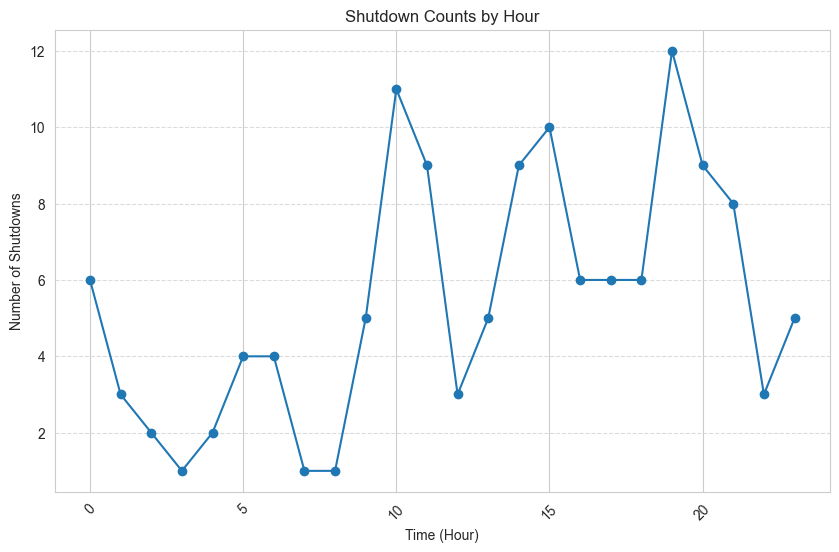

In [61]:
grouped_by_hour = filtered_df.groupby('hour').agg({'electricity_shutdown': lambda x: (x > 0).sum()}).reset_index()


plt.figure(figsize=(10, 6))

plt.plot(grouped_by_hour['hour'], grouped_by_hour['electricity_shutdown'], marker='o', linestyle='-')
plt.title('Shutdown Counts by Hour')
plt.xlabel('Time (Hour)')
plt.ylabel('Number of Shutdowns')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

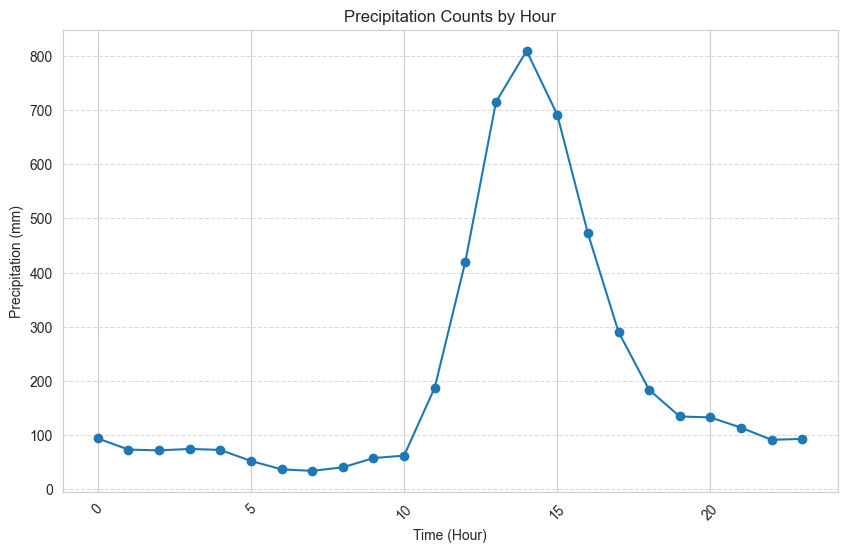

In [62]:
grouped_by_hour2 = filtered_df2.groupby('hour').agg({'precipitation (mm)': 'sum'}).reset_index()


plt.figure(figsize=(10, 6))

plt.plot(grouped_by_hour2['hour'], grouped_by_hour2['precipitation (mm)'], marker='o', linestyle='-')
plt.title('Precipitation Counts by Hour')
plt.xlabel('Time (Hour)')
plt.ylabel('Precipitation (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

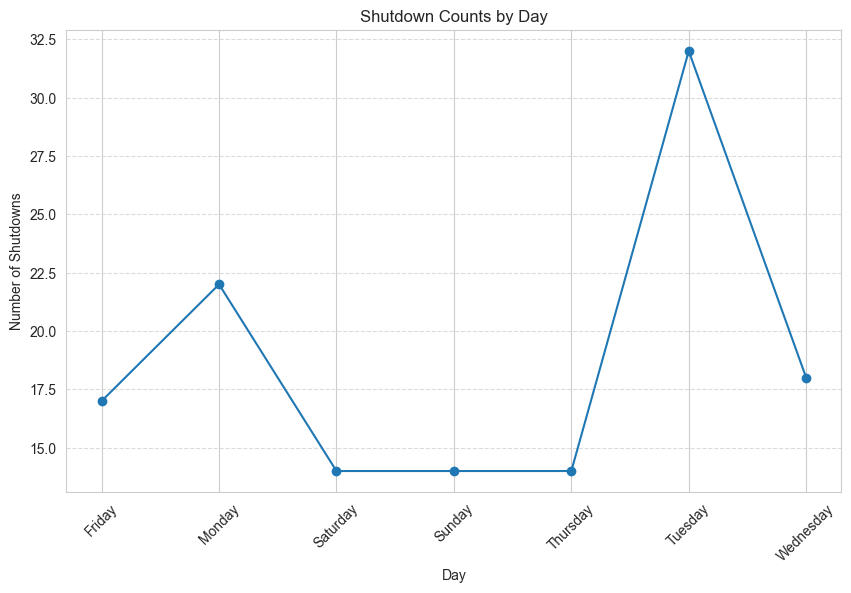

In [63]:
grouped_by_day = filtered_df.groupby('day').agg({'electricity_shutdown': lambda x: (x > 0).sum()}).reset_index()


plt.figure(figsize=(10, 6))

plt.plot(grouped_by_day['day'], grouped_by_day['electricity_shutdown'], marker='o', linestyle='-')
plt.title('Shutdown Counts by Day')
plt.xlabel('Day')
plt.ylabel('Number of Shutdowns')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

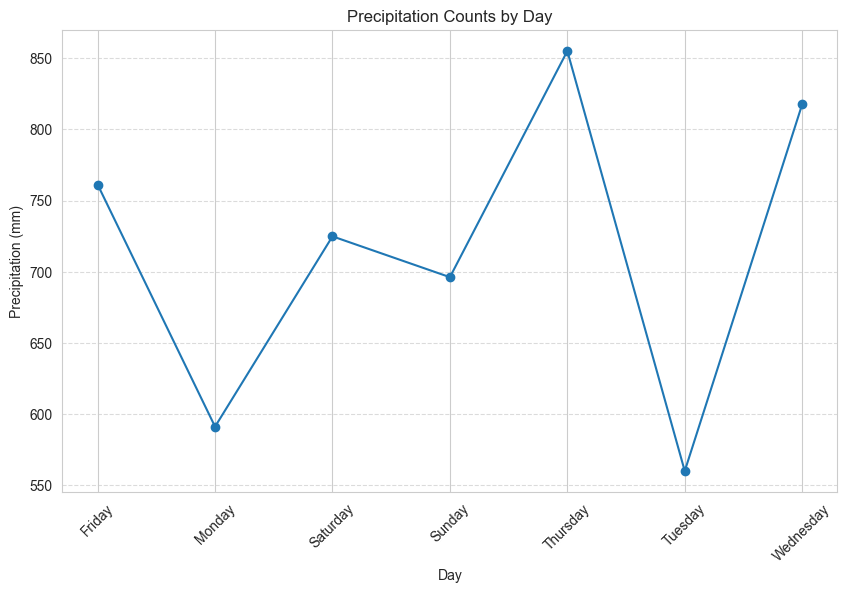

In [64]:
grouped_by_day2 = filtered_df2.groupby('day').agg({'precipitation (mm)': 'sum'}).reset_index()


plt.figure(figsize=(10, 6))

plt.plot(grouped_by_day2['day'], grouped_by_day2['precipitation (mm)'], marker='o', linestyle='-')
plt.title('Precipitation Counts by Day')
plt.xlabel('Day')
plt.ylabel('Precipitation (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

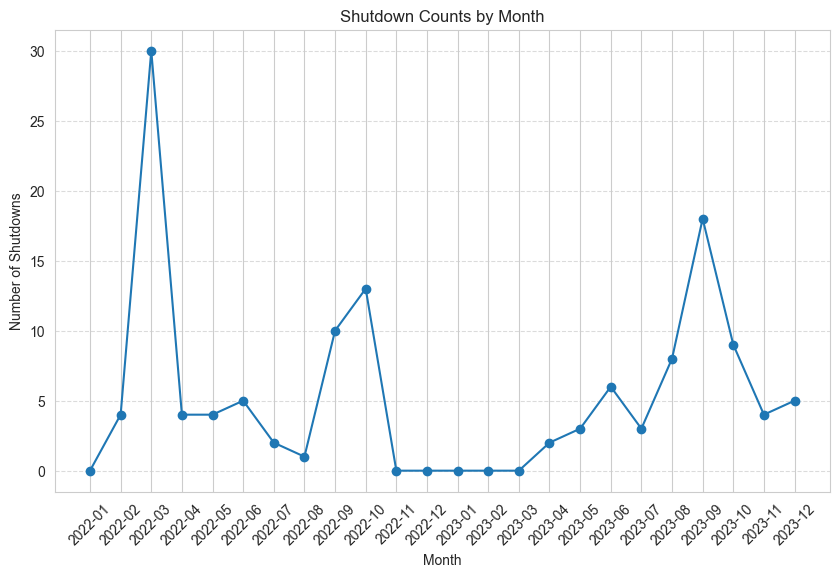

In [65]:
grouped_by_month = filtered_df.groupby('month').agg({'electricity_shutdown': lambda x: (x > 0).sum()}).reset_index()


plt.figure(figsize=(10, 6))
grouped_by_month['month'] = grouped_by_month['month'].dt.strftime('%Y-%m')
plt.plot(grouped_by_month['month'], grouped_by_month['electricity_shutdown'], marker='o', linestyle='-')
plt.title('Shutdown Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Shutdowns')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

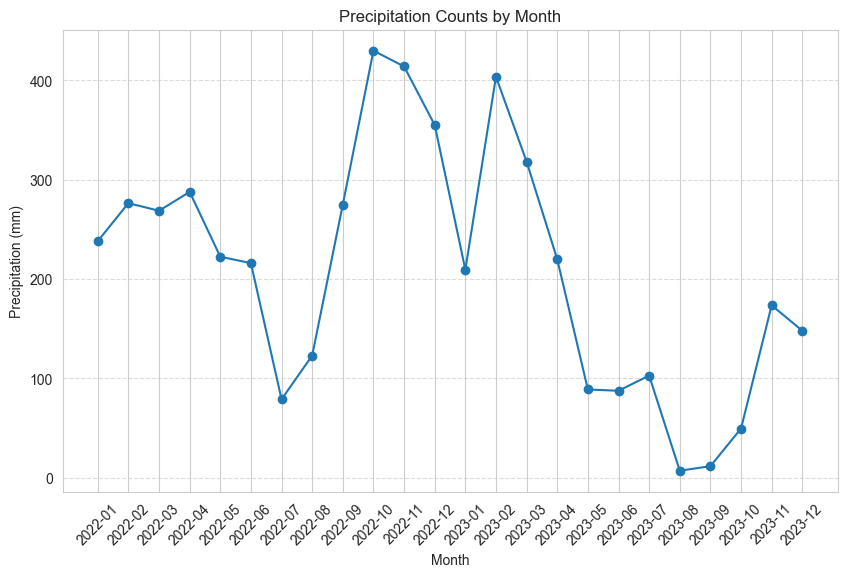

In [66]:
grouped_by_month2 = filtered_df2.groupby('month').agg({'precipitation (mm)': 'sum'}).reset_index()


plt.figure(figsize=(10, 6))
grouped_by_month2['month'] = grouped_by_month2['month'].dt.strftime('%Y-%m')
plt.plot(grouped_by_month2['month'], grouped_by_month2['precipitation (mm)'], marker='o', linestyle='-')
plt.title('Precipitation Counts by Month')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

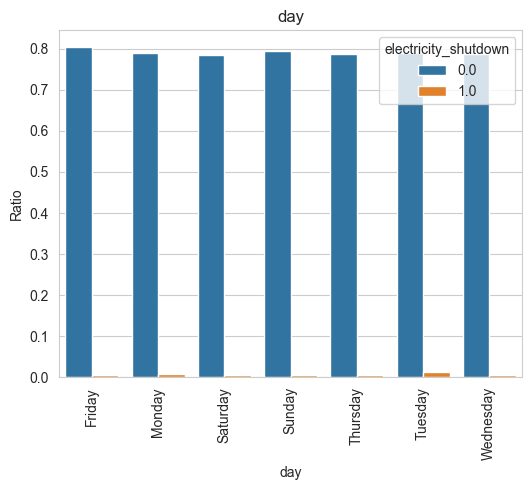

In [67]:
def countplot_on_income_grid_as_ratio(df):
    # Mendapatkan semua kolom bertipe 'object' (kecuali 'electricity_shutdown' jika ada)
    object_columns = [col for col in df.select_dtypes(include='object').columns if col != 'electricity_shutdown']
    
    n_cols = 3  # Menentukan jumlah kolom dalam grid
    n_rows = (len(object_columns) + n_cols - 1) // n_cols  # Menghitung jumlah baris yang dibutuhkan
    
    # Mengatur ukuran figure
    plt.figure(figsize=(n_cols * 5, n_rows * 5))
    
    # Loop melalui semua kolom bertipe 'object' dan buat barplot untuk rasio masing-masing
    for index, col in enumerate(object_columns):
        # Menghitung proporsi setiap kategori dalam kolom berdasarkan 'electricity_shutdown'
        prop_df = df.groupby([col, 'electricity_shutdown']).size().reset_index(name='count')
        total_df = df.groupby(col).size().reset_index(name='total')
        merged_df = pd.merge(prop_df, total_df, on=col)
        merged_df['ratio'] = merged_df['count'] / merged_df['total']
        
        plt.subplot(n_rows, n_cols, index + 1)  # Menentukan posisi subplot
        sns.barplot(x=col, y='ratio', hue='electricity_shutdown', data=merged_df)
        plt.xticks(rotation=90)
        plt.title(col)
        plt.ylabel('Ratio')
        plt.tight_layout()

    plt.show()

# Contoh penggunaan
countplot_on_income_grid_as_ratio(df)

In [68]:
# filtered_df['month'] = filtered_df['time'].dt.month.apply(lambda x: f'{x:02d}')
# filtered_df2['month'] = filtered_df2['time'].dt.month.apply(lambda x: f'{x:02d}')
# Create dummy variables and convert them to int
# month_dummies = pd.get_dummies(filtered_df['month'], prefix='month').astype(int)
day_dummies = pd.get_dummies(filtered_df['day'], prefix='day').astype(int)
hour_dummies = pd.get_dummies(filtered_df['hour'], prefix='hour').astype(int)

# Join these dummy variables back to the original dataframe
filtered_df = filtered_df.join(day_dummies).join(hour_dummies)#.join(month_dummies)

# Repeat for the second dataframe
day_dummies2 = pd.get_dummies(filtered_df2['day'], prefix='day').astype(int)
hour_dummies2 = pd.get_dummies(filtered_df2['hour'], prefix='hour').astype(int)

filtered_df2 = filtered_df2.join(day_dummies2).join(hour_dummies2)#.join(month_dummies)



In [69]:
df['month']

16913    2023-12
12514    2023-06
14456    2023-08
11011    2023-04
11790    2023-05
          ...   
14696    2023-09
1099     2022-02
11798    2023-05
6637     2022-10
2575     2022-04
Name: month, Length: 17520, dtype: period[M]

In [70]:
filtered_df.drop(columns=['ID', 'day', 'month', 'time', 'hour'], inplace=True)
filtered_df2.drop(columns=['ID', 'day', 'month', 'time', 'hour'], inplace=True)
filtered_df.columns

Index(['temperature', 'relative_humidity_2m (%)', 'dew_point',
       'apparent_temperature', 'precipitation (mm)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m', 'wind_direction_100m',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm (m?/m?)',
       'soil_moisture_7_to_28cm (m?/m?)', 'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'shortwave_radiation (W/m?)',
       'direct_radiation (W/m?)', 'diffuse_radiation (W/m?)',
       'direct_normal_irradiance (W/m?)', 'terrestrial_radiation (W/m?)',
       'is_day ()', 'sunshine_duration (s)', 'electricity_shutdown',
       'day_Friday', 'day_M

In [71]:
filtered_df2.isnull().sum()

temperature                 0
relative_humidity_2m (%)    0
dew_point                   0
apparent_temperature        0
precipitation (mm)          0
                           ..
hour_19                     0
hour_20                     0
hour_21                     0
hour_22                     0
hour_23                     0
Length: 64, dtype: int64

PCA

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA

In [73]:
scaler = StandardScaler()
pca_df = filtered_df[["shortwave_radiation (W/m?)", "sunshine_duration (s)", "terrestrial_radiation (W/m?)", 
                      "direct_normal_irradiance (W/m?)", "diffuse_radiation (W/m?)", "direct_radiation (W/m?)"]]
scaled_pca_df = scaler.fit_transform(pca_df)

pca = PCA(n_components=1)
pca_components = pca.fit_transform(scaled_pca_df)


pca_result_df = pd.DataFrame(pca_components, columns=['PC1'])

pca_df2 = filtered_df2[["shortwave_radiation (W/m?)", "sunshine_duration (s)", "terrestrial_radiation (W/m?)",
                        "direct_normal_irradiance (W/m?)", "diffuse_radiation (W/m?)", "direct_radiation (W/m?)"]]
scaled_pca_df2 = scaler.transform(pca_df2)

pca2 = PCA(n_components=1)
pca_components2 = pca2.fit_transform(scaled_pca_df2)


pca_result_df2 = pd.DataFrame(pca_components2, columns=['PC1'])


In [74]:
filtered_df['PC1'] = pca_result_df['PC1']
filtered_df.drop(columns=["shortwave_radiation (W/m?)", "sunshine_duration (s)", "terrestrial_radiation (W/m?)", "direct_normal_irradiance (W/m?)",
                     "diffuse_radiation (W/m?)", "direct_radiation (W/m?)"], inplace=True)

filtered_df2['PC1'] = pca_result_df2['PC1']
filtered_df2.drop(columns=["shortwave_radiation (W/m?)", "sunshine_duration (s)", "terrestrial_radiation (W/m?)", "direct_normal_irradiance (W/m?)",
                     "diffuse_radiation (W/m?)", "direct_radiation (W/m?)"], inplace=True)

filtered_df['PC1'].fillna(filtered_df['PC1'].median(), inplace=True)
filtered_df2['PC1'].fillna(filtered_df2['PC1'].median(), inplace=True)

In [75]:
scaler_lagi = StandardScaler()
X_scaled = scaler_lagi.fit_transform(filtered_df[['temperature', 'soil_temperature_0_to_7cm', 'apparent_temperature', 
                                                  'vapour_pressure_deficit (kPa)', 'wind_gusts_10m (km/h)']])


# Step 2: Fit PCA
pca3 = PCA(n_components=2)
pca_components3 = pca3.fit_transform(X_scaled)

pca_result3 = pd.DataFrame(pca_components3, columns=[f'PC{i}' for i in range(2, 4)])

#filtered_df = filtered_df.join(pca_result3)

X_scaled2 = scaler_lagi.transform(filtered_df2[['temperature', 'soil_temperature_0_to_7cm', 'apparent_temperature', 
                                                  'vapour_pressure_deficit (kPa)', 'wind_gusts_10m (km/h)']])
pca_components4 = pca3.transform(X_scaled2)

pca_result4 = pd.DataFrame(pca_components4, columns=[f'PC{i}' for i in range(2, 4)])

#filtered_df2 = filtered_df2.join(pca_result4)


In [76]:
# Reset index of the original DataFrames
filtered_df = filtered_df.reset_index(drop=True)
filtered_df2 = filtered_df2.reset_index(drop=True)

# Reset index of PCA results
pca_result3 = pca_result3.reset_index(drop=True)
pca_result4 = pca_result4.reset_index(drop=True)

# Join PCA results with original DataFrames
filtered_df = filtered_df.join(pca_result3)
filtered_df2 = filtered_df2.join(pca_result4)


In [77]:
filtered_df.drop(columns=['temperature', 'soil_temperature_0_to_7cm', 'apparent_temperature', 
                                                  'vapour_pressure_deficit (kPa)', 'wind_gusts_10m (km/h)'], inplace=True)


filtered_df2.drop(columns=['temperature', 'soil_temperature_0_to_7cm', 'apparent_temperature', 
                                                  'vapour_pressure_deficit (kPa)', 'wind_gusts_10m (km/h)'], inplace=True)

In [78]:
# scaler_bro = StandardScaler()
# X_scaled_bro = scaler_bro.fit_transform(filtered_df[['PC2', 'relative_humidity_2m (%)']])
# X_scaled_bro2 = scaler_bro.transform(filtered_df2[['PC2', 'relative_humidity_2m (%)']])
# pca_bro = PCA(n_components=1)
# pca_bro_components = pca_bro.fit_transform(X_scaled_bro)
# pca_bro_components2 = pca_bro.transform(X_scaled_bro2)
# pca_result_bro = pd.DataFrame(pca_bro_components, columns=['PC_2'])
# pca_result_bro2 = pd.DataFrame(pca_bro_components2, columns=['PC_2'])
# filtered_df['PC_2'] = pca_result_bro['PC_2']
# filtered_df2['PC_2'] = pca_result_bro2['PC_2']


In [79]:
# filtered_df.drop(columns=['PC2', 'relative_humidity_2m (%)'], inplace=True)
# filtered_df2.drop(columns=['PC2', 'relative_humidity_2m (%)'], inplace=True)

In [80]:
# scaler_lagi2 = StandardScaler()
# X_scaled3 = scaler_lagi2.fit_transform(filtered_df[['pressure_msl (hPa)',
#        'surface_pressure (hPa)']])
# pca5 = PCA(n_components=1)
# pca_components5 = pca5.fit_transform(X_scaled3)

# pca_result5 = pd.DataFrame(pca_components5, columns=['PC4'])

# filtered_df = filtered_df.join(pca_result5)

# X_scaled4 = scaler_lagi2.transform(filtered_df2[['pressure_msl (hPa)',
#          'surface_pressure (hPa)']])

# pca_components6 = pca5.transform(X_scaled4)

# pca_result6 = pd.DataFrame(pca_components6, columns=['PC4'])

# filtered_df2 = filtered_df2.join(pca_result6)

# filtered_df.drop(columns=['pressure_msl (hPa)',
#        'surface_pressure (hPa)'], inplace=True)

# filtered_df2.drop(columns=['pressure_msl (hPa)',
#        'surface_pressure (hPa)'], inplace=True)

In [81]:
# from sklearn.decomposition import FactorAnalysis
# from sklearn.preprocessing import StandardScaler

# # Step 1: Standardize the Data
# scaler_lagi2 = StandardScaler()
# X_scaled3 = scaler_lagi2.fit_transform(filtered_df[['pressure_msl (hPa)', 'surface_pressure (hPa)']])

# # Step 2: Apply Factor Analysis
# fa = FactorAnalysis(n_components=1)
# fa_components = fa.fit_transform(X_scaled3)

# # Step 3: Create a DataFrame for the Factor Scores
# fa_result = pd.DataFrame(fa_components, columns=['FA1'])

# # Step 4: Join the Factor Scores with the Original DataFrame
# filtered_df = filtered_df.join(fa_result)

# # Step 5: Apply the Same Transformation to the Test Data
# X_scaled4 = scaler_lagi2.transform(filtered_df2[['pressure_msl (hPa)', 'surface_pressure (hPa)']])
# fa_components2 = fa.transform(X_scaled4)
# fa_result2 = pd.DataFrame(fa_components2, columns=['FA1'])

# # Step 6: Join the Factor Scores with the Test DataFrame
# filtered_df2 = filtered_df2.join(fa_result2)

# # Step 7: Drop the Original Columns
# filtered_df.drop(columns=['pressure_msl (hPa)', 'surface_pressure (hPa)'], inplace=True)
# filtered_df2.drop(columns=['pressure_msl (hPa)', 'surface_pressure (hPa)'], inplace=True)


In [82]:
# scaler_lagi3 = StandardScaler()
# X_scaled5 = scaler_lagi3.fit_transform(filtered_df[['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm']])
# pca7 = PCA(n_components=3)
# pca_components7 = pca7.fit_transform(X_scaled5)

# # Rename PCA components to avoid overlap
# pca_result7 = pd.DataFrame(pca_components7, columns=['Soil_PC5', 'Soil_PC6', 'Soil_PC7'])

# X_scaled6 = scaler_lagi3.transform(filtered_df2[['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm']])
# pca_components8 = pca7.transform(X_scaled6)

# # Rename PCA components to avoid overlap
# pca_result8 = pd.DataFrame(pca_components8, columns=['Soil_PC5', 'Soil_PC6', 'Soil_PC7'])

# # Drop original soil temperature columns
# filtered_df.drop(columns=['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm'], inplace=True)
# filtered_df2.drop(columns=['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm'], inplace=True)

# # Reset index of PCA results
# pca_result7 = pca_result7.reset_index(drop=True)
# pca_result8 = pca_result8.reset_index(drop=True)

# # Join PCA results with original DataFrames
# filtered_df = filtered_df.join(pca_result7)
# filtered_df2 = filtered_df2.join(pca_result8)


In [83]:
# scaler_lagi4 = StandardScaler()
# X_scaled7 = scaler_lagi4.fit_transform(filtered_df[['wind_speed_10m (km/h)', 'wind_speed_100m (km/h)']])
# pca9 = PCA(n_components=1)
# pca_components9 = pca9.fit_transform(X_scaled7)

# # Rename PCA components to avoid overlap
# pca_result9 = pd.DataFrame(pca_components9, columns=['Wind_PC7'])

# X_scaled8 = scaler_lagi4.transform(filtered_df2[['wind_speed_10m (km/h)', 'wind_speed_100m (km/h)']])
# pca_components10 = pca9.transform(X_scaled8)

# # Rename PCA components to avoid overlap
# pca_result10 = pd.DataFrame(pca_components10, columns=['Wind_PC7'])

# # Drop original wind speed columns
# filtered_df.drop(columns=['wind_speed_10m (km/h)', 'wind_speed_100m (km/h)'], inplace=True)
# filtered_df2.drop(columns=['wind_speed_10m (km/h)', 'wind_speed_100m (km/h)'], inplace=True)

# # Reset index of PCA results
# pca_result9 = pca_result9.reset_index(drop=True)
# pca_result10 = pca_result10.reset_index(drop=True)

# # Join PCA results with original DataFrames
# filtered_df = filtered_df.join(pca_result9)
# filtered_df2 = filtered_df2.join(pca_result10)


In [84]:
# scaler_lagi5 = StandardScaler()
# X_scaled9 = scaler_lagi5.fit_transform(filtered_df[['soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
#        'soil_moisture_28_to_100cm (m?/m?)',
#        'soil_moisture_100_to_255cm (m?/m?)']])
# pca11 = PCA(n_components=1)
# pca_components11 = pca11.fit_transform(X_scaled9)

# # Rename PCA components to avoid overlap
# pca_result11 = pd.DataFrame(pca_components11, columns = ['Soil_Moisture_PC8'])

# X_scaled10 = scaler_lagi5.transform(filtered_df2[['soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
#          'soil_moisture_28_to_100cm (m?/m?)',
#          'soil_moisture_100_to_255cm (m?/m?)']])
# pca_components12 = pca11.transform(X_scaled10)

# # Rename PCA components to avoid overlap
# pca_result12 = pd.DataFrame(pca_components12, columns=['Soil_Moisture_PC8'])

# # Drop original soil moisture columns
# filtered_df.drop(columns=['soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
#        'soil_moisture_28_to_100cm (m?/m?)',
#        'soil_moisture_100_to_255cm (m?/m?)'], inplace=True)
# filtered_df2.drop(columns=['soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
#          'soil_moisture_28_to_100cm (m?/m?)',
#          'soil_moisture_100_to_255cm (m?/m?)'], inplace=True)

# # Reset index of PCA results
# pca_result11 = pca_result11.reset_index(drop=True)
# pca_result12 = pca_result12.reset_index(drop=True)

# # Join PCA results with original DataFrames
# filtered_df = filtered_df.join(pca_result11)
# filtered_df2 = filtered_df2.join(pca_result12)


In [85]:
filtered_df.columns

Index(['relative_humidity_2m (%)', 'dew_point', 'precipitation (mm)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m',
       'wind_direction_100m', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'is_day ()',
       'electricity_shutdown', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_2

Binning

In [86]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# Create the KBinsDiscretizer objects
discretizer1 = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

# Fit the discretizer to the data
discretizer1.fit(filtered_df[['PC1']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'
discretizer2.fit(filtered_df2[['PC1']])# , 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'

# Transform the data using the fitted discretizer
discretized_data = discretizer1.transform(filtered_df[['PC1']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'
discretized_data2 = discretizer2.transform(filtered_df2[['PC1']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'

# Convert the transformed data to DataFrames
discretized_df = pd.DataFrame(discretized_data, columns=['PC1_binned'
                                                         
                                                         ]) #, 'PC4_binned', 'Soil_PC5_binned', 'Soil_PC6_binned', 'Wind_PC7_binned', 'Soil_Moisture_PC8_binned', 'Soil_Moisture_PC9_binned', 'Soil_Moisture_PC10_binned'
discretized_df2 = pd.DataFrame(discretized_data2, columns=['PC1_binned'
                                                         ]) #, 'PC4_binned', 'Soil_PC5_binned', 'Soil_PC6_binned', 'Wind_PC7_binned', 'Soil_Moisture_PC8_binned', 'Soil_Moisture_PC9_binned', 'Soil_Moisture_PC10_binned'
# Replace the original 'PC1' column with the binned data
filtered_df['PC1'] = discretized_df['PC1_binned']
# filtered_df['PC2'] = discretized_df['PC2_binned']
# filtered_df['PC3'] = discretized_df['PC3_binned']
# filtered_df['FA1'] = discretized_df['FA1_binned']
# filtered_df['PC4'] = discretized_df['PC4_binned']
# filtered_df['Soil_PC5'] = discretized_df['Soil_PC5_binned']
# filtered_df['Soil_PC6'] = discretized_df['Soil_PC6_binned']
# filtered_df['Wind_PC7'] = discretized_df['Wind_PC7_binned']
# filtered_df['Soil_Moisture_PC8'] = discretized_df['Soil_Moisture_PC8_binned']
# filtered_df['Soil_Moisture_PC9'] = discretized_df['Soil_Moisture_PC9_binned']
# filtered_df['Soil_Moisture_PC10'] = discretized_df['Soil_Moisture_PC10_binned']

# Replace the original 'PC1' column with the binned data
filtered_df2['PC1'] = discretized_df2['PC1_binned']
# filtered_df2['PC2'] = discretized_df2['PC2_binned']
# filtered_df2['PC3'] = discretized_df2['PC3_binned']
# filtered_df2['FA1'] = discretized_df2['FA1_binned']
# filtered_df2['PC4'] = discretized_df2['PC4_binned']
# filtered_df2['Soil_PC5'] = discretized_df2['Soil_PC5_binned']
# filtered_df2['Soil_PC6'] = discretized_df2['Soil_PC6_binned']
# filtered_df2['Wind_PC7'] = discretized_df2['Wind_PC7_binned']
# filtered_df2['Soil_Moisture_PC8'] = discretized_df2['Soil_Moisture_PC8_binned']
# filtered_df2['Soil_Moisture_PC9'] = discretized_df2['Soil_Moisture_PC9_binned']
# filtered_df2['Soil_Moisture_PC10'] = discretized_df2['Soil_Moisture_PC10_binned']


In [87]:
filtered_df["PC1"].value_counts()

0.0    9227
3.0    1655
2.0    1624
1.0    1483
Name: PC1, dtype: int64

In [88]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# Create the KBinsDiscretizer objects
discretizer1 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
discretizer2 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

# Fit the discretizer to the data
discretizer1.fit(filtered_df[['PC2']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'
discretizer2.fit(filtered_df2[['PC2']])# , 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'

# Transform the data using the fitted discretizer
discretized_data = discretizer1.transform(filtered_df[['PC2']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'
discretized_data2 = discretizer2.transform(filtered_df2[['PC2']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'

# Convert the transformed data to DataFrames
discretized_df = pd.DataFrame(discretized_data, columns=['PC2_binned'
                                                         
                                                         ]) #, 'PC4_binned', 'Soil_PC5_binned', 'Soil_PC6_binned', 'Wind_PC7_binned', 'Soil_Moisture_PC8_binned', 'Soil_Moisture_PC9_binned', 'Soil_Moisture_PC10_binned'
discretized_df2 = pd.DataFrame(discretized_data2, columns=['PC2_binned'
                                                         ]) #, 'PC4_binned', 'Soil_PC5_binned', 'Soil_PC6_binned', 'Wind_PC7_binned', 'Soil_Moisture_PC8_binned', 'Soil_Moisture_PC9_binned', 'Soil_Moisture_PC10_binned'
# Replace the original 'PC2' column with the binned data
filtered_df['PC2'] = discretized_df['PC2_binned']
# filtered_df['PC2'] = discretized_df['PC2_binned']
# filtered_df['PC3'] = discretized_df['PC3_binned']
# filtered_df['FA1'] = discretized_df['FA1_binned']
# filtered_df['PC4'] = discretized_df['PC4_binned']
# filtered_df['Soil_PC5'] = discretized_df['Soil_PC5_binned']
# filtered_df['Soil_PC6'] = discretized_df['Soil_PC6_binned']
# filtered_df['Wind_PC7'] = discretized_df['Wind_PC7_binned']
# filtered_df['Soil_Moisture_PC8'] = discretized_df['Soil_Moisture_PC8_binned']
# filtered_df['Soil_Moisture_PC9'] = discretized_df['Soil_Moisture_PC9_binned']
# filtered_df['Soil_Moisture_PC10'] = discretized_df['Soil_Moisture_PC10_binned']

# Replace the original 'PC2' column with the binned data
filtered_df2['PC2'] = discretized_df2['PC2_binned']
# filtered_df2['PC2'] = discretized_df2['PC2_binned']
# filtered_df2['PC3'] = discretized_df2['PC3_binned']
# filtered_df2['FA1'] = discretized_df2['FA1_binned']
# filtered_df2['PC4'] = discretized_df2['PC4_binned']
# filtered_df2['Soil_PC5'] = discretized_df2['Soil_PC5_binned']
# filtered_df2['Soil_PC6'] = discretized_df2['Soil_PC6_binned']
# filtered_df2['Wind_PC7'] = discretized_df2['Wind_PC7_binned']
# filtered_df2['Soil_Moisture_PC8'] = discretized_df2['Soil_Moisture_PC8_binned']
# filtered_df2['Soil_Moisture_PC9'] = discretized_df2['Soil_Moisture_PC9_binned']
# filtered_df2['Soil_Moisture_PC10'] = discretized_df2['Soil_Moisture_PC10_binned']


In [89]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# Create the KBinsDiscretizer objects
discretizer1 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
discretizer2 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

# Fit the discretizer to the data
discretizer1.fit(filtered_df[['PC3']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'
discretizer2.fit(filtered_df2[['PC3']])# , 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'

# Transform the data using the fitted discretizer
discretized_data = discretizer1.transform(filtered_df[['PC3']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'
discretized_data2 = discretizer2.transform(filtered_df2[['PC3']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'

# Convert the transformed data to DataFrames
discretized_df = pd.DataFrame(discretized_data, columns=['PC3_binned'
                                                         
                                                         ]) #, 'PC4_binned', 'Soil_PC5_binned', 'Soil_PC6_binned', 'Wind_PC7_binned', 'Soil_Moisture_PC8_binned', 'Soil_Moisture_PC9_binned', 'Soil_Moisture_PC10_binned'
discretized_df2 = pd.DataFrame(discretized_data2, columns=['PC3_binned'
                                                         ]) #, 'PC4_binned', 'Soil_PC5_binned', 'Soil_PC6_binned', 'Wind_PC7_binned', 'Soil_Moisture_PC8_binned', 'Soil_Moisture_PC9_binned', 'Soil_Moisture_PC10_binned'
# Replace the original 'PC3' column with the binned data
filtered_df['PC3'] = discretized_df['PC3_binned']
# filtered_df['PC2'] = discretized_df['PC2_binned']
# filtered_df['PC3'] = discretized_df['PC3_binned']
# filtered_df['FA1'] = discretized_df['FA1_binned']
# filtered_df['PC4'] = discretized_df['PC4_binned']
# filtered_df['Soil_PC5'] = discretized_df['Soil_PC5_binned']
# filtered_df['Soil_PC6'] = discretized_df['Soil_PC6_binned']
# filtered_df['Wind_PC7'] = discretized_df['Wind_PC7_binned']
# filtered_df['Soil_Moisture_PC8'] = discretized_df['Soil_Moisture_PC8_binned']
# filtered_df['Soil_Moisture_PC9'] = discretized_df['Soil_Moisture_PC9_binned']
# filtered_df['Soil_Moisture_PC10'] = discretized_df['Soil_Moisture_PC10_binned']

# Replace the original 'PC3' column with the binned data
filtered_df2['PC3'] = discretized_df2['PC3_binned']
# filtered_df2['PC2'] = discretized_df2['PC2_binned']
# filtered_df2['PC3'] = discretized_df2['PC3_binned']
# filtered_df2['FA1'] = discretized_df2['FA1_binned']
# filtered_df2['PC4'] = discretized_df2['PC4_binned']
# filtered_df2['Soil_PC5'] = discretized_df2['Soil_PC5_binned']
# filtered_df2['Soil_PC6'] = discretized_df2['Soil_PC6_binned']
# filtered_df2['Wind_PC7'] = discretized_df2['Wind_PC7_binned']
# filtered_df2['Soil_Moisture_PC8'] = discretized_df2['Soil_Moisture_PC8_binned']
# filtered_df2['Soil_Moisture_PC9'] = discretized_df2['Soil_Moisture_PC9_binned']
# filtered_df2['Soil_Moisture_PC10'] = discretized_df2['Soil_Moisture_PC10_binned']


In [90]:
filtered_df.columns

Index(['relative_humidity_2m (%)', 'dew_point', 'precipitation (mm)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m',
       'wind_direction_100m', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'is_day ()',
       'electricity_shutdown', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_2

Class distribution before SMOTE: 0.0    9702
1.0      90
Name: electricity_shutdown, dtype: int64
Class distribution after SMOTE: 0.0    9702
1.0    9702
Name: electricity_shutdown, dtype: int64
Accuracy: 0.9475816059089827
Precision: 0.06763285024154589
Recall: 0.34146341463414637
F1 Score: 0.11290322580645161


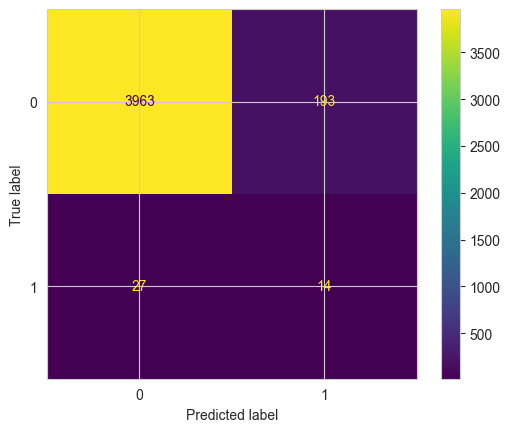

In [91]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import xgboost as xgb
# Assuming all necessary imports have been done

# Splitting the data
X = filtered_df.drop(columns=['precipitation (mm)', 'electricity_shutdown'])
y = filtered_df['electricity_shutdown']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance of the classes after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_smote.value_counts())

# Specify the columns to scale
columns_to_scale = ['dew_point',  'cloud_cover (%)', 'cloud_cover_low (%)', 'relative_humidity_2m (%)',
                    'cloud_cover_mid (%)', 'cloud_cover_high (%)',  'wind_direction_10m', 'wind_direction_100m',
                    'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)'
                    ,'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)', 'soil_moisture_28_to_100cm (m?/m?)',
                      'soil_moisture_100_to_255cm (m?/m?)', 'soil_temperature_7_to_28cm',
                        'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm'
                        ]
# Scaling the data
scaler2 = StandardScaler()
scaler2.fit(X_train_smote[columns_to_scale])

X_train_smote[columns_to_scale] = scaler2.transform(X_train_smote[columns_to_scale])
X_test[columns_to_scale] = scaler2.transform(X_test[columns_to_scale])

# Train the XGBoost model
xgbc = xgb.XGBClassifier(
    objective='binary:logistic',
    colsample_bytree=0.1,
    gamma=0.9891850487958684,
    learning_rate=0.01499734609645683,
    max_depth=98,
    min_child_weight=9,
    n_estimators=857,
    reg_alpha=36.321125466597664,
    reg_lambda=1e-09,
    scale_pos_weight=50,
    subsample=1.0,
)

xgbc.fit(X_train_smote, y_train_smote)
y_pred = xgbc.predict(X_test)

# Print metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.show()


In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from skopt import BayesSearchCV
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
# Example train-test split (you should adjust this as per your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter space for Bayesian search
param_space = {
    'colsample_bytree': (0.1, 1.0),
    'gamma': (0.01, 1.0),
    'learning_rate': (0.01, 0.3),
    'max_depth': (3, 100),
    'min_child_weight': (1, 10),
    'n_estimators': (100, 1000),
    'reg_alpha': (0.1, 100.0),
    'reg_lambda': (1e-9, 100),
    'scale_pos_weight': (1, 100),
    'subsample': (0.1, 1.0),
}

# Initialize the XGBoost classifier
xgbc = XGBClassifier(objective='binary:logistic', random_state=42)

# Define the BayesSearchCV object with F1 scoring
opt = BayesSearchCV(
    estimator=xgbc,
    search_spaces=param_space,
    n_iter=32,  # Number of iterations for the search
    cv=3,  # 3-fold cross-validation
    n_jobs=4,  # Use 4 CPU cores for parallel processing
    scoring='f1',  # Optimize for F1 score
    random_state=42
)

# Fit the search to the SMOTE-resampled training data
opt.fit(X_train_smote, y_train_smote)

# Print the best score and best parameters
print("Best F1 score during search:", opt.best_score_)
print("Best parameters:", opt.best_params_)

# Evaluate on the test set
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)
print("Test set F1 score:", test_f1)


Best F1 score during search: 0.9964498448586266
Best parameters: OrderedDict([('colsample_bytree', 0.6937189880726604), ('gamma', 0.053560823525657025), ('learning_rate', 0.04233699638449989), ('max_depth', 67), ('min_child_weight', 8), ('n_estimators', 175), ('reg_alpha', 0.1), ('reg_lambda', 1e-09), ('scale_pos_weight', 1), ('subsample', 0.7435030557811662)])
Test set F1 score: 0.14285714285714285


In [93]:
#bayes search for decision tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Define the parameter space for Bayesian search
param_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': (1, 100),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': (0.1, 1.0),
}

# Define the BayesSearchCV object with F1 scoring
opt = BayesSearchCV(
    estimator=dtc,
    search_spaces=param_space,
    n_iter=32,  # Number of iterations for the search
    cv=3,  # 3-fold cross-validation
    n_jobs=4,  # Use 4 CPU cores for parallel processing
    scoring='f1',  # Optimize for F1 score
    random_state=42
)

# Fit the search to the SMOTE-resampled training data
opt.fit(X_train_smote, y_train_smote)

# Print the best score and best parameters
print("Best F1 score during search:", opt.best_score_)
print("Best parameters:", opt.best_params_)
# Evaluate on the test set
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)
print("Test set F1 score:", test_f1)

Best F1 score during search: 0.9877592080151664
Best parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 98), ('max_features', 1.0), ('min_samples_leaf', 1), ('min_samples_split', 10)])
Test set F1 score: 0.08695652173913043


In [94]:
#bayes search for random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(random_state=42)

# Define the parameter space for Bayesian search
param_space = {
    'n_estimators': (100, 1000),
    'criterion': ['gini', 'entropy'],
    'max_depth': (1, 100),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': (0.1, 1.0),
}

# Define the BayesSearchCV object with F1 scoring
opt = BayesSearchCV(
    estimator=rfc,
    search_spaces=param_space,
    n_iter=32,  # Number of iterations for the search
    cv=3,  # 3-fold cross-validation
    n_jobs=4,  # Use 4 CPU cores for parallel processing
    scoring='f1',  # Optimize for F1 score
    random_state=42
)

# Fit the search to the SMOTE-resampled training data
opt.fit(X_train_smote, y_train_smote)

# Print the best score and best parameters
print("Best F1 score during search:", opt.best_score_)
print("Best parameters:", opt.best_params_)
# Evaluate on the test set
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

Best F1 score during search: 0.9966310829665878
Best parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 39), ('max_features', 0.1), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 100)])


In [95]:
# Print the F1 score on the test set
print("Test set F1 score:", test_f1)

Test set F1 score: 0.0


In [96]:
#bayes search for logistic regression
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Define the parameter space for Bayesian search
param_space = {
    'C': (1e-6, 1e+6, 'log-uniform'),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
}

# Define the BayesSearchCV object with F1 scoring
opt = BayesSearchCV(
    estimator=lr,
    search_spaces=param_space,
    n_iter=32,  # Number of iterations for the search
    cv=3,  # 3-fold cross-validation
    n_jobs=4,  # Use 4 CPU cores for parallel processing
    scoring='f1',  # Optimize for F1 score
    random_state=42
)

# Fit the search to the SMOTE-resampled training data
opt.fit(X_train_smote, y_train_smote)

# Print the best score and best parameters
print("Best F1 score during search:", opt.best_score_)
print("Best parameters:", opt.best_params_)
# Evaluate on the test set
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

# Print the F1 score on the test set
print("Test set F1 score:", test_f1)

Best F1 score during search: 0.9951491854292512
Best parameters: OrderedDict([('C', 11185.625288472094), ('penalty', 'l2'), ('solver', 'liblinear')])
Test set F1 score: 0.0


In [97]:
#bayes search for support vector machine
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svc = SVC(random_state=42)

# Define the parameter space for Bayesian search
param_space = {
    'C': (1e-6, 1e+6, 'log-uniform'),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': (1, 10),
    'gamma': ['scale', 'auto'],
}

# Define the BayesSearchCV object with F1 scoring
opt = BayesSearchCV(
    estimator=svc,
    search_spaces=param_space,
    n_iter=32,  # Number of iterations for the search
    cv=3,  # 3-fold cross-validation
    n_jobs=4,  # Use 4 CPU cores for parallel processing
    scoring='f1',  # Optimize for F1 score
    random_state=42
)

# Fit the search to the SMOTE-resampled training data
opt.fit(X_train_smote, y_train_smote)

# Print the best score and best parameters
print("Best F1 score during search:", opt.best_score_)
print("Best parameters:", opt.best_params_)
# Evaluate on the test set
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

# Print the F1 score on the test set
print("Test set F1 score:", test_f1)

KeyboardInterrupt: 

In [104]:
#bayes search for k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Define the parameter space for Bayesian search
param_space = {
    'n_neighbors': (1, 100),
    'weights': ['uniform', 'distance'],
    'p': (1, 2),
}

# Define the BayesSearchCV object with F1 scoring
opt = BayesSearchCV(
    estimator=knn,
    search_spaces=param_space,
    n_iter=32,  # Number of iterations for the search
    cv=3,  # 3-fold cross-validation
    n_jobs=4,  # Use 4 CPU cores for parallel processing
    scoring='f1',  # Optimize for F1 score
    random_state=42
)

# Fit the search to the SMOTE-resampled training data
opt.fit(X_train_smote, y_train_smote)

# Print the best score and best parameters
print("Best F1 score during search:", opt.best_score_)
print("Best parameters:", opt.best_params_)

# Evaluate on the test set
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

# Print the F1 score on the test set
print("Test set F1 score:", test_f1)

c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1, 'distance'] before, using random point [96, 1, 'uniform']
  warnings.warn(
c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1, 'distance'] before, using random point [46, 1, 'uniform']
  warnings.warn(
c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1, 'distance'] before, using random point [38, 1, 'distance']
  warnings.warn(
c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1, 'distance'] before, using random point [100, 2, 'distance']
  warnings.warn(
c:\Users\farel\AppDat

Best F1 score during search: 0.9736081611233783
Best parameters: OrderedDict([('n_neighbors', 1), ('p', 1), ('weights', 'distance')])
Test set F1 score: 0.12972972972972974


In [1304]:
from sklearn.neural_network import MLPClassifier

# Train the MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    shuffle=True,
    random_state=42
)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

# Print metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))


Accuracy: 0.9847510126280676
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [2093]:
#bayes search catboost
from catboost import CatBoostClassifier
from skopt import BayesSearchCV

# Define the search space
search_space = {
    'iterations': (10, 1000),
    'depth': (1, 16),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'random_strength': (1e-9, 10, 'log-uniform'),
    'bagging_temperature': (0.0, 1.0),
    'border_count': (1, 255),
    'l2_leaf_reg': (2, 30),
    'scale_pos_weight': (1, 100)
}

# Create the BayesSearchCV object
bayes_search = BayesSearchCV(
    CatBoostClassifier(task_type='GPU', verbose=0),
    search_space,
    n_iter=32,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

# Fit the model
bayes_search.fit(X_train, y_train)

# Print the best parameters
print(bayes_search.best_params_)
print(bayes_search.best_score_)
print(bayes_search.best_estimator_)

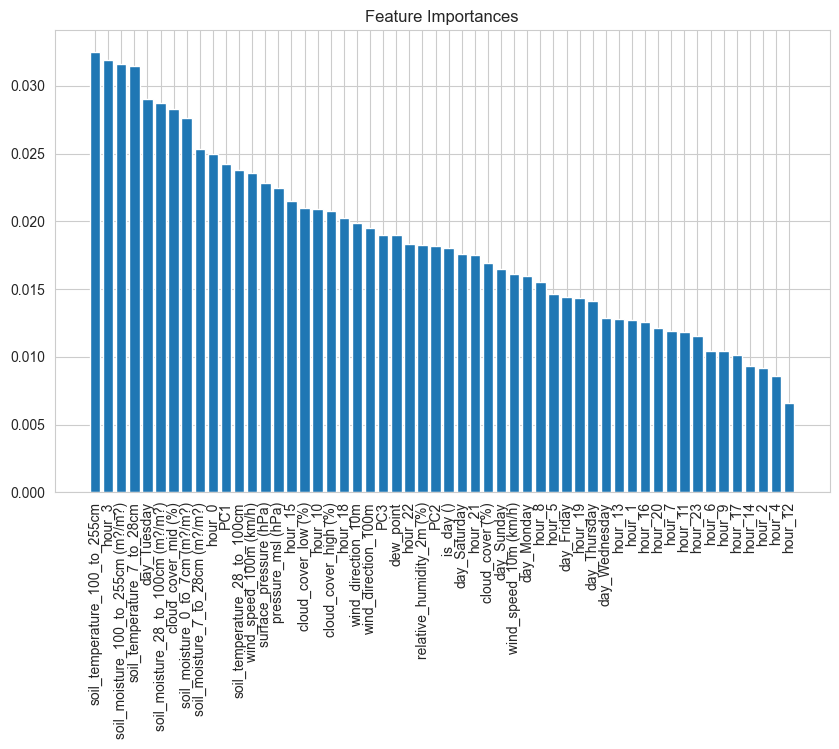

In [1300]:
xgbc.feature_importances_

# Get the feature importances
importances = xgbc.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.show()


In [1302]:
print(indices)

[14 30 18 12 25 17  6 15 16 27 51 13  9  3  2 42  5 37  7 45 10 11 53  1
 49  0 52 19 22 48  4 23  8 21 35 32 20 46 24 26 40 28 43 47 34 38 50 33
 36 44 41 29 31 39]


In [819]:
import xgboost as xgb


xgbr = xgb.XGBRegressor(colsample_bylevel = 1.0, colsample_bynode = 1.0, colsample_bytree = 0.7, gamma = 0, learning_rate = 0.01,
                        max_depth = 3, n_estimators = 2000, n_jobs = -1, reg_alpha = 0, reg_lambda = 1, subsample = 1.0)

X = filtered_df2.drop(columns=['precipitation (mm)', 'electricity_shutdown'])
y = filtered_df2['precipitation (mm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train[columns_to_scale] = scaler2.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler2.transform(X_test[columns_to_scale])
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.63


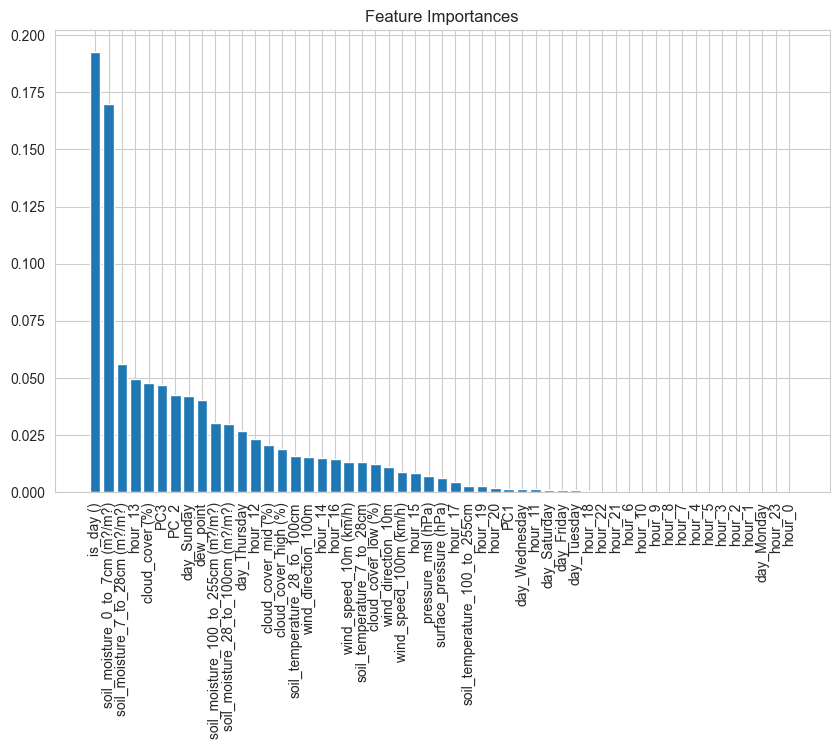

In [731]:
xgbr.feature_importances_

# Get the feature importances
importances = xgbr.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.show()

In [ ]:
final_score = rmse * (1-F1score)

In [91]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_}')
print(f'Best Estimator: {grid_search.best_estimator_}')

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Optionally, you can also compute additional metrics if needed
from sklearn.metrics import f1_score
print(f'F1 Score on Test Set: {f1_score(y_test, y_pred)}')


NameError: name 'grid_search' is not defined

Accuracy: 0.9699785561115082
Precision: 0.102803738317757
Recall: 0.2682926829268293
F1 Score: 0.14864864864864866


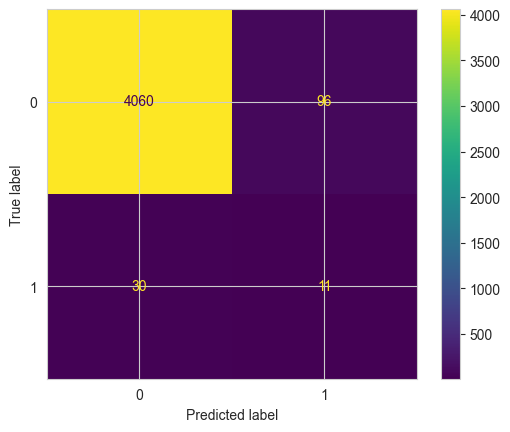

In [ ]:
dt =  DecisionTreeClassifier(class_weight={0: 1, 1: 39}, min_samples_leaf=2,
                       min_samples_split=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])

cm_display.plot()
plt.show()

In [ ]:
#bayes search random forest
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define the parameter grid
param_grid = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 100),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': (2, 10, 25, 50)
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_grid, n_iter=32, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fit BayesSearchCV
bayes_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {bayes_search.best_params_}')
print(f'Best F1 Score: {bayes_search.best_score_}')
print(f'Best Estimator: {bayes_search.best_estimator_}')

# Predict on the test set
y_pred = bayes_search.predict(X_test)

# Optionally, you can also compute additional metrics if needed
from sklearn.metrics import f1_score
print(f'F1 Score on Test Set: {f1_score(y_test, y_pred)}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
import xgboost as xgb


from skopt import BayesSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 100),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'subsample': (0.1, 1.0),
    'min_child_weight': (1, 10),
    'colsample_bytree': (0.1, 1.0),
    'gamma': (0.1, 1.0),
    'reg_alpha': (1e-9, 1000, 'log-uniform'),
    'reg_lambda': (1e-9, 1000, 'log-uniform'),
    'scale_pos_weight': (1, 100)
}

# Initialize the XGBClassifier
xgbc = xgb.XGBClassifier()

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(estimator=xgbc, search_spaces=param_grid, n_iter=32, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fit BayesSearchCV
bayes_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {bayes_search.best_params_}')
print(f'Best F1 Score: {bayes_search.best_score_}')
print(f'Best Estimator: {bayes_search.best_estimator_}')

# Predict on the test set
y_pred = bayes_search.predict(X_test)

# Optionally, you can also compute additional metrics if needed
from sklearn.metrics import f1_score
print(f'F1 Score on Test Set: {f1_score(y_test, y_pred)}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
#import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge

scaler3 = StandardScaler()
#initialize the linear regression model
lr = LinearRegression()





lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# compute the MAPE
score = rmse(y_test, y_pred)
print(score)

TypeError: 'numpy.float64' object is not callable

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the model
model = GradientBoostingRegressor()

# Define the parameters to search with ranges and categories
param_space = {
    'criterion': Categorical(['friedman_mse', 'squared_error']),
    'loss': Categorical(['squared_error', 'huber', 'quantile']),
    'n_estimators': Integer(100, 2000),
    'learning_rate': Real(0.001, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'max_depth': Integer(3, 9),
    # 'max_features': Integer(5, 10, 20, 30, 40),
    'validation_fraction': Real(0.1, 0.5),
    'n_iter_no_change': Integer(5, 20),
    'tol': Real(1e-4, 1e-1, prior='log-uniform'),
    'alpha': Real(0.1, 0.99)
}

# Define the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,  # Number of iterations to run the search
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    random_state=42
)

# Fit the model
bayes_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", bayes_search.best_params_)
print("Best MSE:", -bayes_search.best_score_)  # Multiply by -1 because we set greater_is_better=False

# Use the best model for predictions
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


Best Parameters: OrderedDict([('alpha', 0.7218818785858263), ('criterion', 'friedman_mse'), ('learning_rate', 0.3), ('loss', 'squared_error'), ('max_depth', 3), ('n_estimators', 2000), ('n_iter_no_change', 20), ('subsample', 0.8966464647006094), ('tol', 0.0001), ('validation_fraction', 0.1)])
Best MSE: 0.32913139842085687
RMSE: 0.64


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(alpha = 0.7218818785858263, criterion = 'friedman_mse', learning_rate =  0.3,  loss = 'squared_error', 
                                max_depth = 3, n_estimators = 2000, n_iter_no_change = 20, subsample = 0.8966464647006094, tol = 0.0001,
                                  validation_fraction = 0.1)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.65


In [ ]:
#model with xgboost
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error

# Define the model
model = xgb.XGBRegressor()

# Define the parameters to search
param_grid = {
    'n_estimators': [100, 500, 1000, 2000],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'max_depth': [3, 7, 9],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'colsample_bylevel': [0.5, 0.7, 1.0],
    'colsample_bynode': [0.5, 0.7, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0, 0.5, 1],
    'gamma': [0, 0.5, 1],
    'n_jobs': [-1]
}

# Define the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_grid,
    n_iter=50,  # Number of iterations to run the search
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    random_state=42
)

# Fit the model
bayes_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", bayes_search.best_params_)
print("Best MSE:", -bayes_search.best_score_)  # Multiply by -1 because we set greater_is_better=False

# Use the best model for predictions
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


NameError: name 'BayesSearchCV' is not defined

In [292]:
test["time"] = pd.to_datetime(test["time"])
test.replace(',','.', regex=True, inplace=True)
test.rename(columns={'temperature_2m (EEC)': 'temperature', 'dew_point_2m (EEC)' : 'dew_point', 'apparent_temperature (EEC)' :
                   'apparent_temperature', 'wind_direction_10m (EE)' : 'wind_direction_10m', 'wind_direction_100m (EE)' :
                   'wind_direction_100m', 'soil_temperature_0_to_7cm (EEC)' : 'soil_temperature_0_to_7cm',
                   'soil_temperature_7_to_28cm (EEC)' : 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm (EEC)' :
                   'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm (EEC)' : 'soil_temperature_100_to_255cm'}, inplace=True)

for_cols = test.drop(['time'], axis=1)
cols = for_cols.columns

for col in cols:
    test[col] = pd.to_numeric(test[col], errors='coerce')
    test[col] = test[col].fillna(test[col].median())

var = test.columns.values

var = np.delete(var,np.where(var=="ID"))
var = np.delete(var, np.where(var == "time"))
for feature in var:
    test[feature] = pd.to_numeric(test[feature], errors='coerce')

test['hour'] = test['time'].dt.hour
test['day'] = test['time'].dt.day_name()
test['month'] = test['time'].dt.month.apply(lambda x: f'{x:02d}')

test = test.join(pd.get_dummies(test['day'], prefix='day'))
test = test.join(pd.get_dummies(test['hour'], prefix='hour'))
test = test.join(pd.get_dummies(test['month'], prefix='month'))
test.drop(columns=['global_tilted_irradiance (W/m?)', 'day', 'month', 'hour'], inplace=True)

scalerrr = StandardScaler()
pca_test = test[["shortwave_radiation (W/m?)", "sunshine_duration (s)", "terrestrial_radiation (W/m?)", 
                      "direct_normal_irradiance (W/m?)", "diffuse_radiation (W/m?)", "direct_radiation (W/m?)"]]
scaled_pca_test = scalerrr.fit_transform(pca_test)

pca = PCA(n_components=1)
pca_components_test = pca.fit_transform(scaled_pca_test)


pca_result_test = pd.DataFrame(pca_components_test, columns=['PC1'])
test['PC1'] = pca_result_test['PC1']
test.drop(columns=["shortwave_radiation (W/m?)", "sunshine_duration (s)", "terrestrial_radiation (W/m?)", "direct_normal_irradiance (W/m?)",
                     "diffuse_radiation (W/m?)", "direct_radiation (W/m?)"], inplace=True)

scaler_lagi = StandardScaler()
X_scaled = scaler_lagi.fit_transform(test[['temperature', 'soil_temperature_0_to_7cm', 'apparent_temperature', 
                                                  'vapour_pressure_deficit (kPa)', 'wind_gusts_10m (km/h)']])


# Step 2: Fit PCA
pca3 = PCA(n_components=2)
pca_components3 = pca3.fit_transform(X_scaled)

pca_result3 = pd.DataFrame(pca_components3, columns=[f'PC{i}' for i in range(2, 4)])

test = test.reset_index(drop=True)

# Reset index of PCA results
pca_result3 = pca_result3.reset_index(drop=True)

# Join PCA results with original DataFrames
test = test.join(pca_result3)
test.drop(columns=['temperature', 'soil_temperature_0_to_7cm', 'apparent_temperature', 
                                                  'vapour_pressure_deficit (kPa)', 'wind_gusts_10m (km/h)'], inplace=True)


# Fit the discretizer to the data
discretizer1 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

# Fit the discretizer to the data
discretizer1.fit(test[['PC1', 'PC2', 'PC3']])


# Transform the data using the fitted discretizer
discretized_data = discretizer1.transform(test[['PC1', 'PC2', 'PC3']])


# Convert the transformed data to DataFrames
discretized_df = pd.DataFrame(discretized_data, columns=['PC1_binned', 'PC2_binned', 'PC3_binned'])


# Replace the original 'PC1' column with the binned data
test['PC1'] = discretized_df['PC1_binned']
test['PC2'] = discretized_df['PC2_binned']
test['PC3'] = discretized_df['PC3_binned']




# Convert the transformed data to DataFrames
# discretized_df = pd.DataFrame(discretized_data, columns=['PC1_binned'])
# discretized_df2 = pd.DataFrame(discretized_data2, columns=['PC1_binned'])

# Replace the original 'PC1' column with the binned data



In [295]:
test.columns

Index(['ID', 'time', 'relative_humidity_2m (%)', 'dew_point',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m',
       'wind_direction_100m', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'is_day ()', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_

In [293]:
test[columns_to_scale] = scaler2.transform(test[columns_to_scale])

In [294]:
testing = test.drop(columns=['ID', 'time'])
preds = xgbc.predict(testing)
submission['electricity_shutdown'] = preds
preds2 = xgbr.predict(testing)
submission['precipitation (mm)'] = preds2
submission['electricity_shutdown'] = submission['electricity_shutdown'].astype(int) 
submission.to_csv('submission8.csv', index=False)

In [ ]:
submission.columns

Index(['ID', 'time', 'precipitation (mm)', 'electricity_shutdown'], dtype='object')

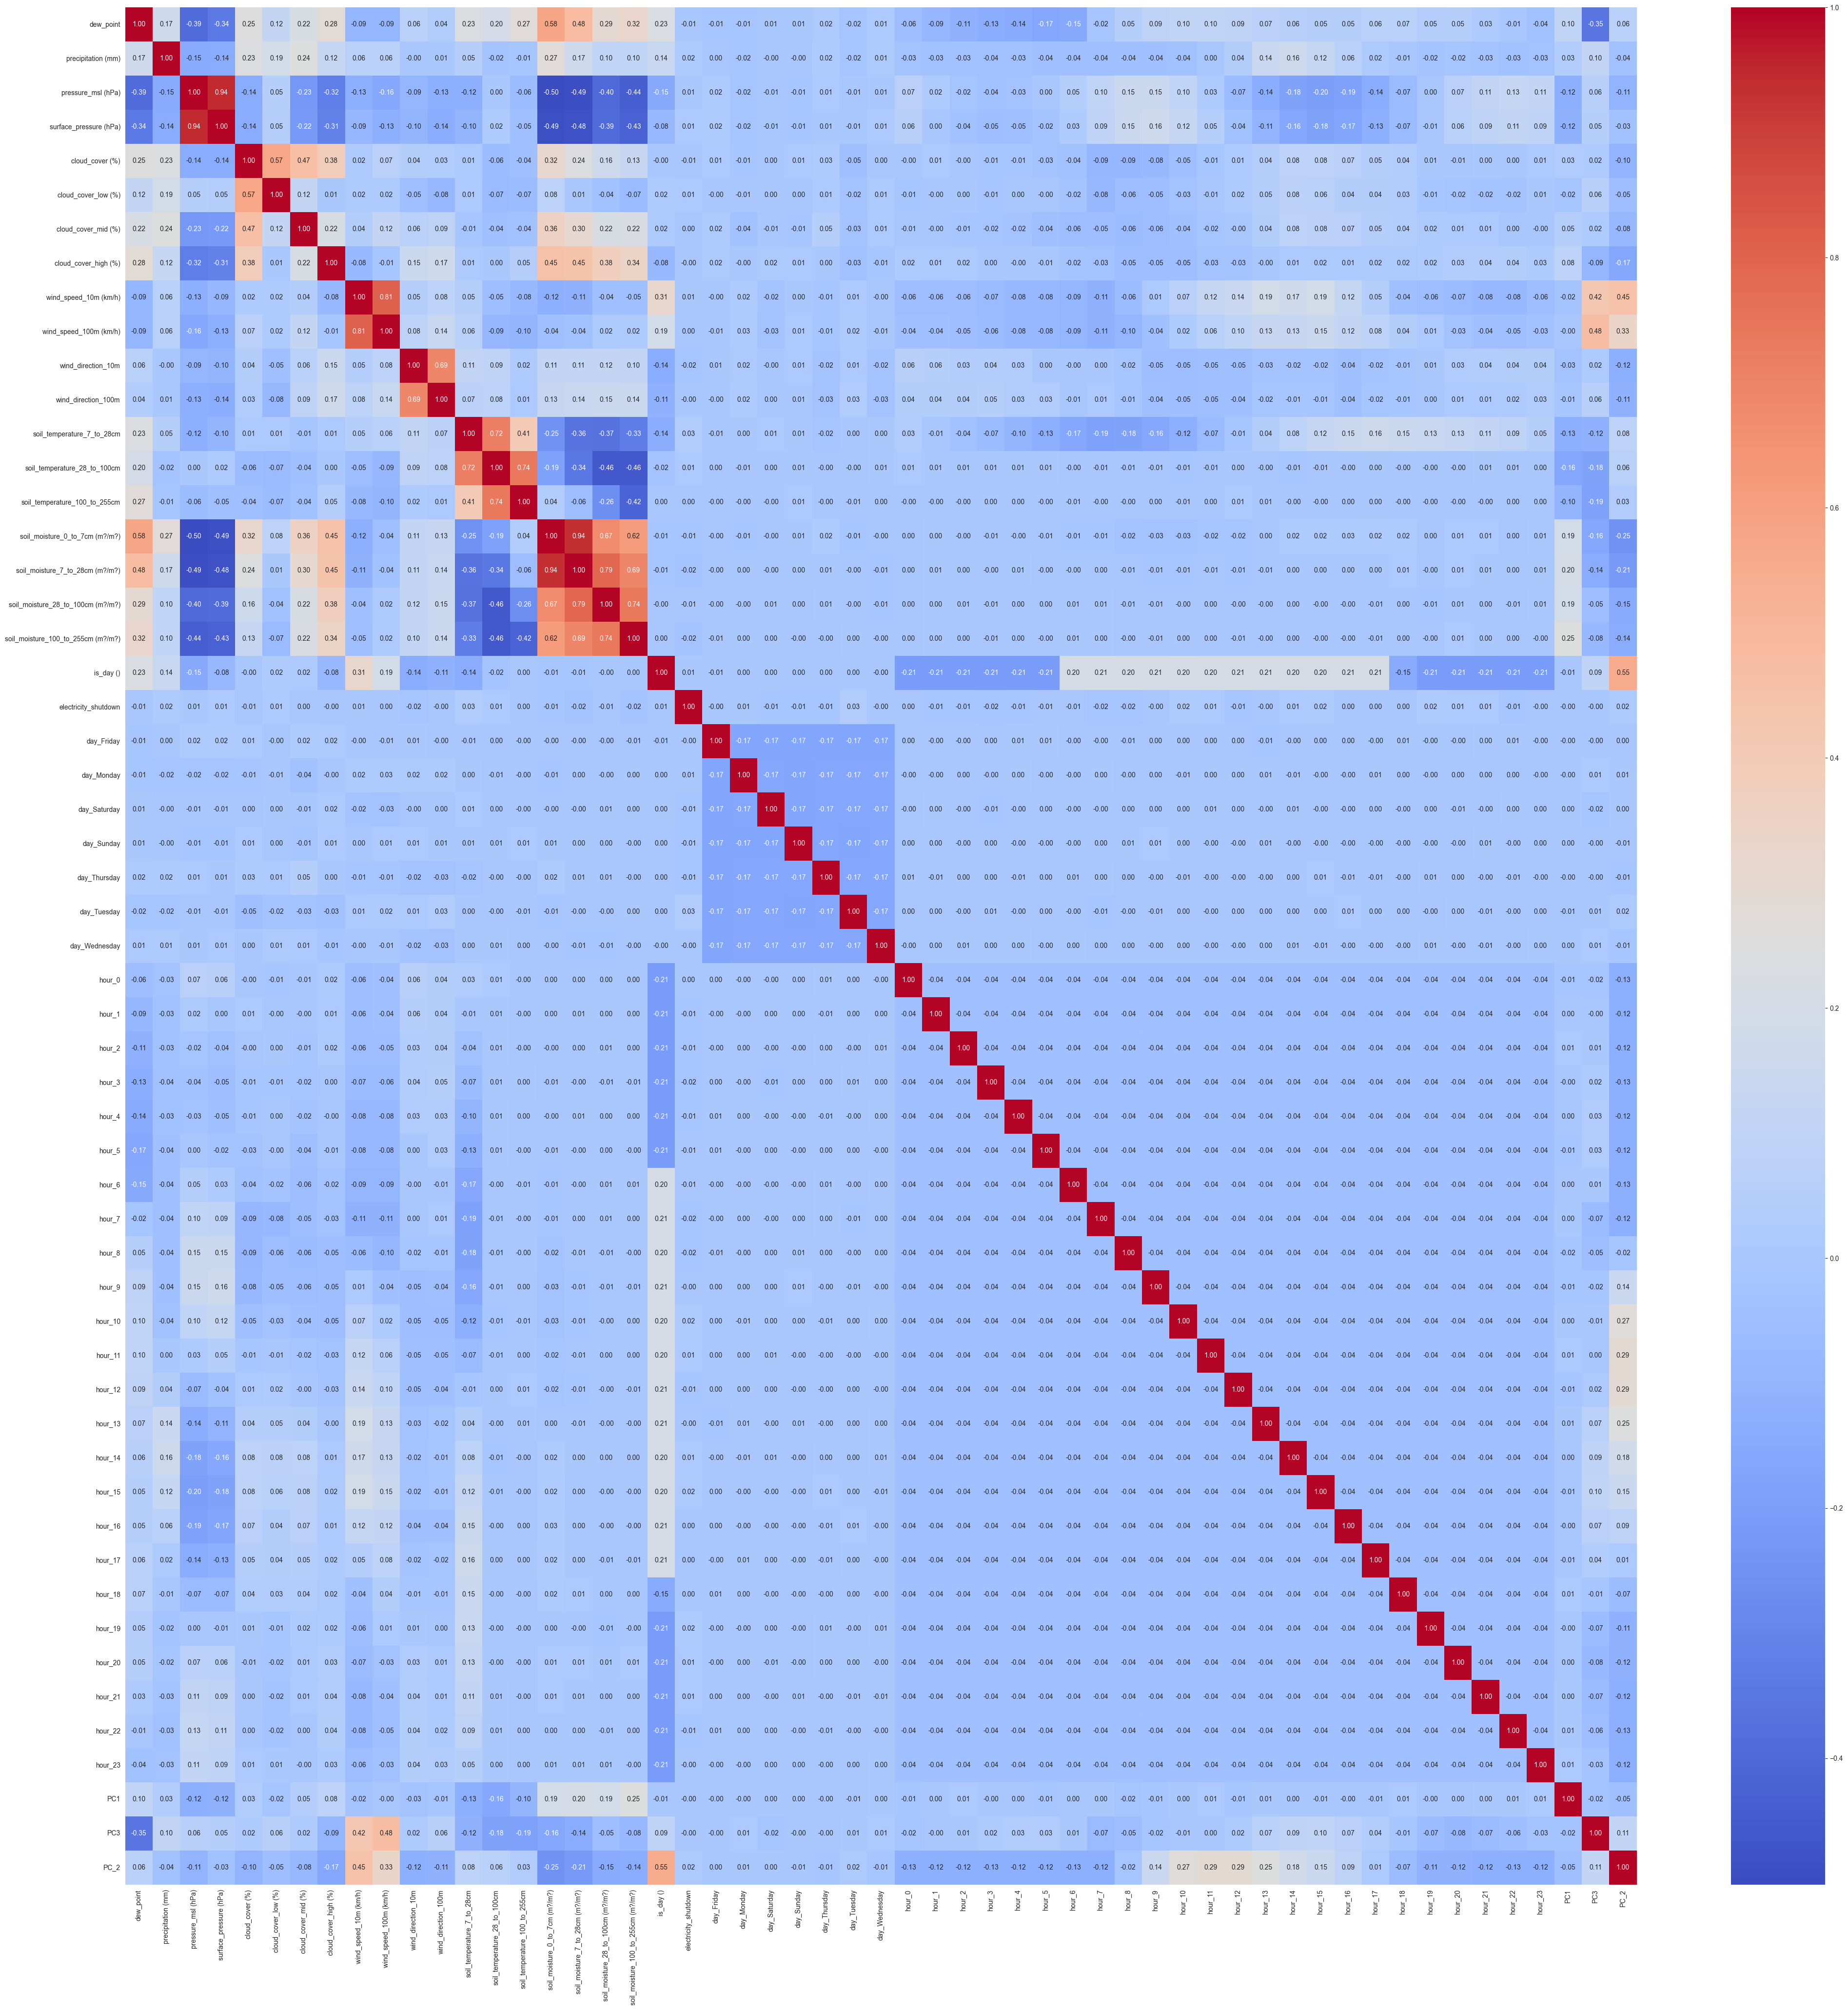

In [737]:
plt.figure(figsize=(50,50))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

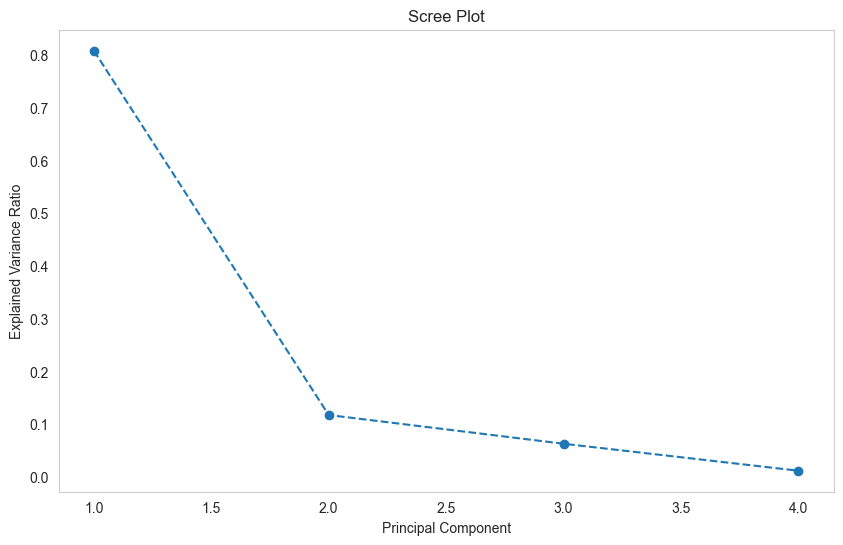

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data (replace this with your actual data)
# X = your data here

# Step 1: Standardize the Data (if needed)
scaler_lagiii = StandardScaler()
X_scaleddd = scaler_lagiii.fit_transform(filtered_df[['soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)']])


# Step 2: Fit PCA
pca = PCA()
pca.fit(X_scaleddd)

# Step 3: Get the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Step 4: Create the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()


In [43]:
filtered_df.columns

Index(['relative_humidity_2m (%)', 'dew_point', 'precipitation (mm)',
       'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)',
       'cloud_cover_high (%)', 'wind_direction_10m', 'wind_direction_100m',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'is_day ()',
       'electricity_shutdown', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'PC1', 'PC2', 'PC3', 'PC4',
       'Soil_PC5', 'Soil_PC6', 'Wind_PC7'],
      dtype='object')

In [ ]:
filtered_df.columns

Index(['relative_humidity_2m (%)', 'dew_point', 'precipitation (mm)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m',
       'wind_direction_100m', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'is_day ()',
       'electricity_shutdown', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_2